In [1]:
import las2 as las
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def read_well(well_path):
    data = las.read(well_path)
    for i in range(len(data['curve'])):
        if data['curve'][i]['mnemonic'] == 'DEPTH':
            depth = data['data'][i]
        elif data['curve'][i]['mnemonic'] == 'GR':
            gr = data['data'][i]
        elif data['curve'][i]['mnemonic'] == 'NPHI':
            nphi = data['data'][i]
        elif data['curve'][i]['mnemonic'] == 'RHOB':
            rhob = data['data'][i]
            
    curves = {'Depth': depth,
              'GR': gr,
              'NPHI': nphi,
              'RHOB': rhob}
    return curves

In [22]:
well_path = "../data/7-MP-28D-BA.las"
data = read_well(well_path)

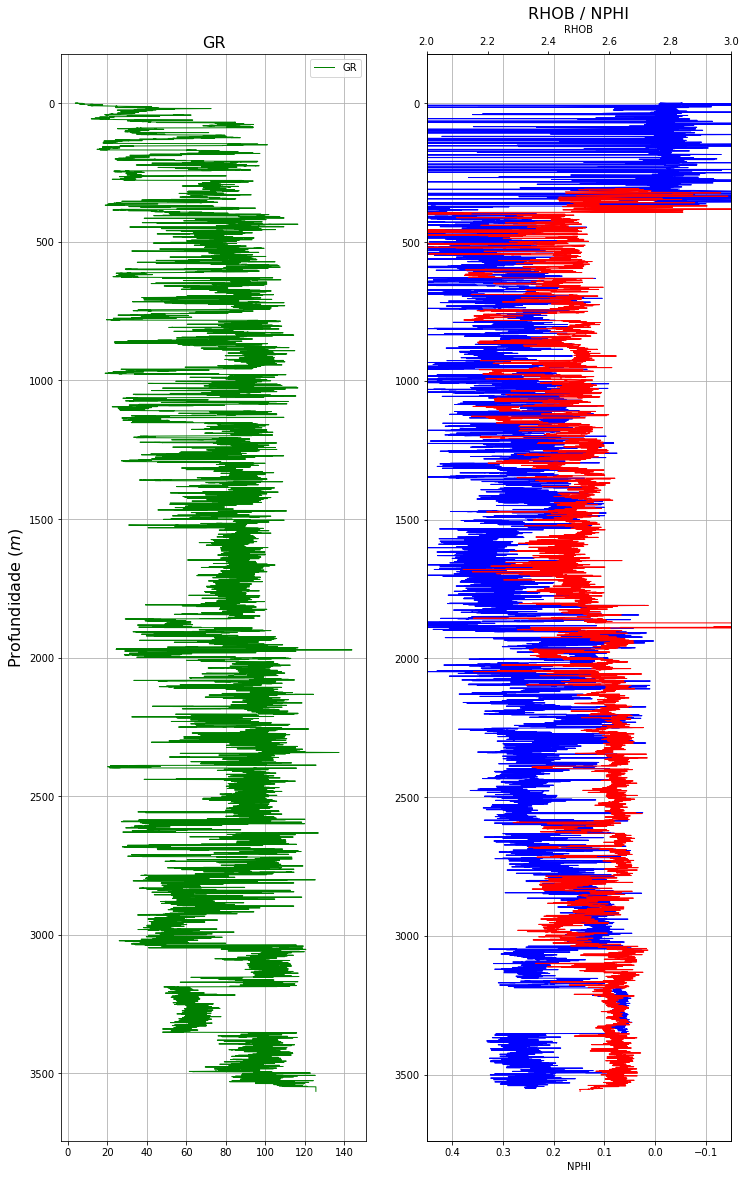

In [23]:
### Graficos

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12, 20) # tamanho da figura | polegadas

#_____________________________________________________#

ax1.plot(data['GR'],data['Depth'],'-g',linewidth = 1,label='GR')
# (eixo x, eixo y, cor e tipo, comprimento da curva, legenda )
#ax1.plot(well_28D[3],well_28D[0],'-k',linewidth = 1,label='BS')
#ax1.plot(well_28D[5],well_28D[0],'-k',linewidth = 1,label='CAL')
ax1.invert_yaxis()
# inverte o eixo y
ax1.grid()
ax2.set_xlim([0.0, 150.0])
# adiciona o 'grid' ou malha de fundo
ax1.set_ylabel('Profundidade ($m$)', fontsize=16)
# o que vai ser escrito no eixo y
ax1.set_title('GR', fontsize=16)
# titulo do 'track' ou do grafico com tamanho de letra 16
ax1.legend()

#_____________________________________________________#

ax2.plot(data['NPHI'], data['Depth'],'-b',linewidth = 1,label='NPHI')
ax2.set_xlim([0.45, -0.15])
ax2.set_xlabel('NPHI')
ax2.invert_yaxis()
ax2.grid()
ax2.set_title('RHOB / NPHI', fontsize=16)

#_____________________________________________________#

ax3 = ax2.twiny()
ax3.plot(data['RHOB'], data['Depth'],'-r',linewidth = 1,label='RHOB')
ax3.set_xlim([2.0, 3.0])
ax3.set_xlabel('RHOB')

plt.show()

## Cálculo do DRDN para interpretar a Litologia

In [24]:
def drdn_log (rhob, nphi):
    drdn = ((rhob-2)/0.05) - ((0.45 - nphi)/0.03)
    return drdn

In [25]:
drdn = drdn_log(data['RHOB'], data['NPHI'])
data['DRDN'] = drdn

In [26]:
lit_py = np.zeros(len(data['DRDN']))

for i in range(len(data['DRDN'])):
    if data['DRDN'][i] < -1.0000:
        lit_py[i] = 49.0000
        
    if data['DRDN'][i] >= -1.0000 and data['DRDN'][i] < -0.3000 :
        lit_py[i] = 25.0000
        
    if data['DRDN'][i] >= -0.3000 and data['DRDN'][i] < 0.3000 :
        lit_py[i] = 54.0000
        
    if data['DRDN'][i] >= 0.3000:
        lit_py[i] = 57.0000
        
    if data['DRDN'][i] == np.nan:
        lit_py[i] = np.nan

In [27]:
data['Lithology_py'] = lit_py

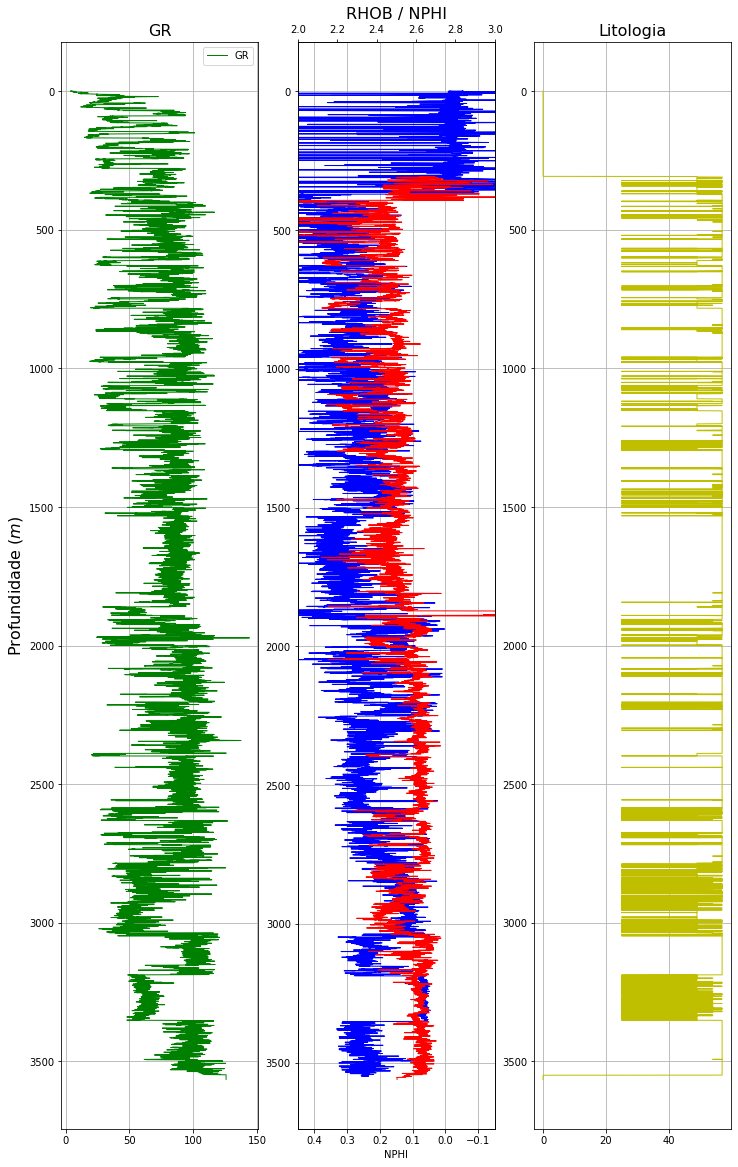

In [28]:
### Graficos

fig, (ax1, ax2, ax4) = plt.subplots(1,3)
fig.set_size_inches(12, 20) # tamanho da figura | polegadas

#_____________________________________________________#

ax1.plot(data['GR'],data['Depth'],'-g',linewidth = 1,label='GR')
# (eixo x, eixo y, cor e tipo, comprimento da curva, legenda )
#ax1.plot(well_28D[3],well_28D[0],'-k',linewidth = 1,label='BS')
#ax1.plot(well_28D[5],well_28D[0],'-k',linewidth = 1,label='CAL')
ax1.invert_yaxis()
# inverte o eixo y
ax1.grid()
ax2.set_xlim([0.0, 150.0])
# adiciona o 'grid' ou malha de fundo
ax1.set_ylabel('Profundidade ($m$)', fontsize=16)
# o que vai ser escrito no eixo y
ax1.set_title('GR', fontsize=16)
# titulo do 'track' ou do grafico com tamanho de letra 16
ax1.legend()

#_____________________________________________________#

ax2.plot(data['NPHI'], data['Depth'],'-b',linewidth = 1,label='NPHI')
ax2.set_xlim([0.45, -0.15])
ax2.set_xlabel('NPHI')
ax2.invert_yaxis()
ax2.grid()
ax2.set_title('RHOB / NPHI', fontsize=16)

#_____________________________________________________#

ax3 = ax2.twiny()
ax3.plot(data['RHOB'], data['Depth'],'-r',linewidth = 1,label='RHOB')
ax3.set_xlim([2.0, 3.0])
#ax3.set_xlabel('RHOB')

#_____________________________________________________#

ax4.plot(data['Lithology_py'], data['Depth'],'-y',linewidth = 1,label='Litologia')
ax4.invert_yaxis()
ax4.grid()
ax4.set_title('Litologia', fontsize=16)

plt.show()

## Formação Maracangalha
#### Topo: 2527 m
#### Base: 3188 m

In [31]:
top = 2527.00
base = 3188.00

In [46]:
for i in range(len(data['Depth'])):
    if data['Depth'][i] < top or data['Depth'][i] > base:
        data['Depth'][i] = np.nan
        data['GR'][i] = np.nan
        data['Lithology_py'] = np.nan

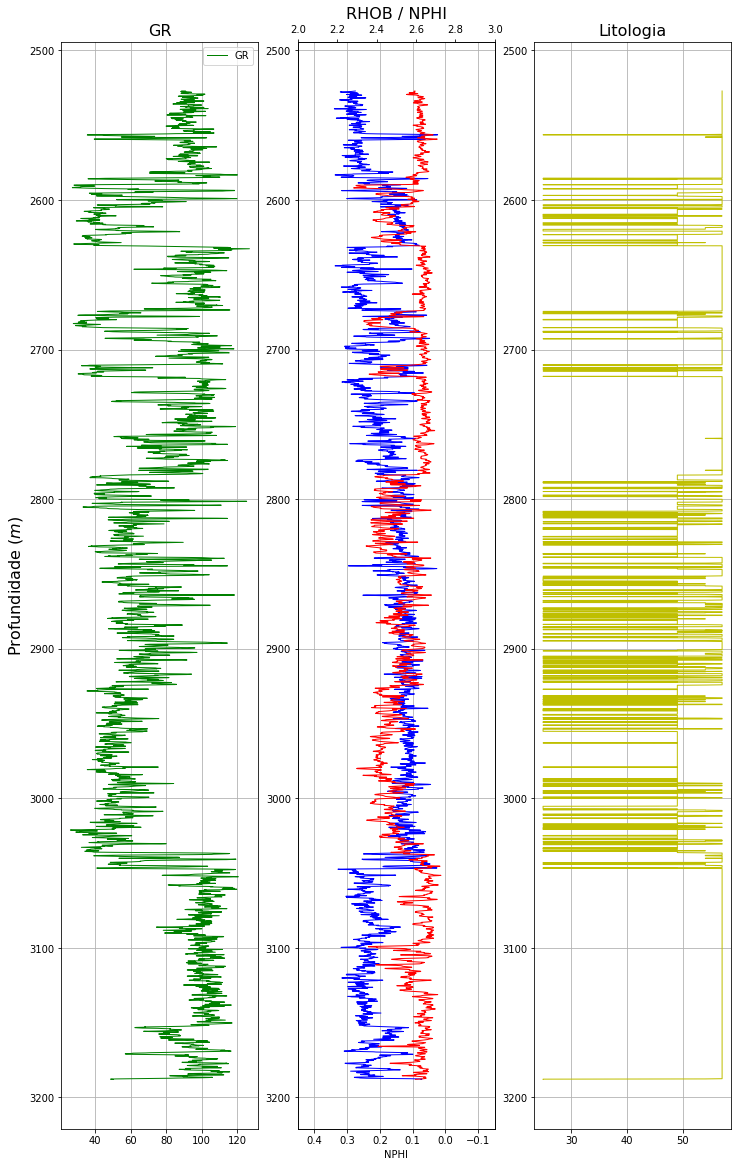

In [45]:
### Graficos

fig, (ax1, ax2, ax4) = plt.subplots(1,3)
fig.set_size_inches(12, 20) # tamanho da figura | polegadas

#_____________________________________________________#

ax1.plot(data['GR'],data['Depth'],'-g',linewidth = 1,label='GR')
# (eixo x, eixo y, cor e tipo, comprimento da curva, legenda )
#ax1.plot(well_28D[3],well_28D[0],'-k',linewidth = 1,label='BS')
#ax1.plot(well_28D[5],well_28D[0],'-k',linewidth = 1,label='CAL')
ax1.invert_yaxis()
# inverte o eixo y
ax1.grid()
ax2.set_xlim([0.0, 150.0])
# adiciona o 'grid' ou malha de fundo
ax1.set_ylabel('Profundidade ($m$)', fontsize=16)
# o que vai ser escrito no eixo y
ax1.set_title('GR', fontsize=16)
# titulo do 'track' ou do grafico com tamanho de letra 16
ax1.legend()

#_____________________________________________________#

ax2.plot(data['NPHI'], data['Depth'],'-b',linewidth = 1,label='NPHI')
ax2.set_xlim([0.45, -0.15])
ax2.set_xlabel('NPHI')
ax2.invert_yaxis()
ax2.grid()
ax2.set_title('RHOB / NPHI', fontsize=16)

#_____________________________________________________#

ax3 = ax2.twiny()
ax3.plot(data['RHOB'], data['Depth'],'-r',linewidth = 1,label='RHOB')
ax3.set_xlim([2.0, 3.0])
#ax3.set_xlabel('RHOB')

#_____________________________________________________#

ax4.plot(data['Lithology_py'], data['Depth'],'-y',linewidth = 1,label='Litologia')
ax4.invert_yaxis()
ax4.grid()
ax4.set_title('Litologia', fontsize=16)

plt.show()

In [55]:
sand = []
shale = []
slury = []
siltite = []

for i in range(len(data['Lithology_py'])):
    if data['Lithology_py'][i] == 57:
        shale.append(i)
    elif data['Lithology_py'][i] == 54:
        siltite.append(i)
    elif data['Lithology_py'][i] == 49:
        sand.append(i)
    elif data['Lithology_py'][i] == 27:
        slury.append(i)

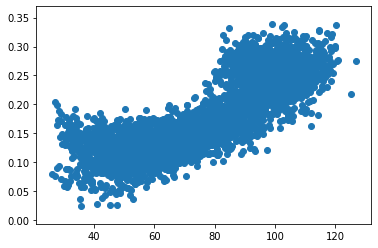

In [63]:
plt.scatter(data['GR'], data['NPHI'])
plt.show()

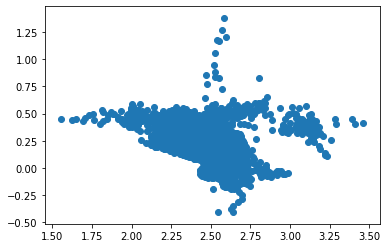

In [64]:
plt.scatter(data['RHOB'], data['NPHI'])
plt.show()